# 0. Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

# 1. Read, Understanding Data

In [2]:
df = pd.read_csv('application_record.csv')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
df2 = pd.read_csv('credit_record.csv')
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# 1.1 What do we have?

ID	Client number	
CODE_GENDER	Gender	
FLAG_OWN_CAR	Is there a car	
FLAG_OWN_REALTY	Is there a property	
CNT_CHILDREN	Number of children	
AMT_INCOME_TOTAL	Annual income	
NAME_INCOME_TYPE	Income category	
NAME_EDUCATION_TYPE	Education level	
NAME_FAMILY_STATUS	Marital status	
NAME_HOUSING_TYPE	Way of living	
DAYS_BIRTH	Birthday
DAYS_EMPLOYED	Start date of employment
FLAG_MOBIL	Is there a mobile phone	
FLAG_WORK_PHONE	Is there a work phone	
FLAG_PHONE	Is there a phone	
FLAG_EMAIL	Is there an email	
OCCUPATION_TYPE	Occupation	
CNT_FAM_MEMBERS	Family size

MONTHS_BALANCE	Record month

STATUS	

        0: 1-29 days past due
        1: 30-59 days past due     
        2: 60-89 days overdue         
        3: 90-119 days overdue        
        4: 120-149 days overdue        
        5: Overdue or bad debts, write-offs for more than 150 days        
        C: paid off that month       
        X: No loan for the month

In [4]:
len(set((df['ID'])) & (set(df2['ID'])))

36457

# 1.2 Prepare Credit Records "df2"

In [5]:
df2[df2['ID'] == 5150487]

,ID,MONTHS_BALANCE,STATUS
1048545,5150487,0,C
1048546,5150487,-1,C
1048547,5150487,-2,C
1048548,5150487,-3,C
1048549,5150487,-4,C
1048550,5150487,-5,C
1048551,5150487,-6,C
1048552,5150487,-7,C
1048553,5150487,-8,C
1048554,5150487,-9,C


In [6]:
df2[df2['MONTHS_BALANCE'] ==0 ]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
23,5001713,0,X
45,5001714,0,X
60,5001715,0,X
...,...,...,...
1048451,5150481,0,X
1048512,5150483,0,X
1048530,5150484,0,C
1048543,5150485,0,0


In [7]:
len(set(df['ID']))

438510

In [8]:
len(set(df2['ID']))

45985

In [9]:
mode = df2.groupby('ID')['STATUS'].agg(pd.Series.mode)
mode = pd.DataFrame(mode)

In [10]:
mode['STATUS'].value_counts()

0         19788
C         16492
X          7936
1            81
5            51
          ...  
[0, X]        1
[0, X]        1
[0, C]        1
[0, X]        1
[0, X]        1
Name: STATUS, Length: 1642, dtype: int64

In [11]:
df_multiclass = df2.replace( { 'X' : 0 , 'C' : 0  , '0' : 1 , '1':2 ,'2':3 ,'3':4 , '4':5 , '5':6 }  )

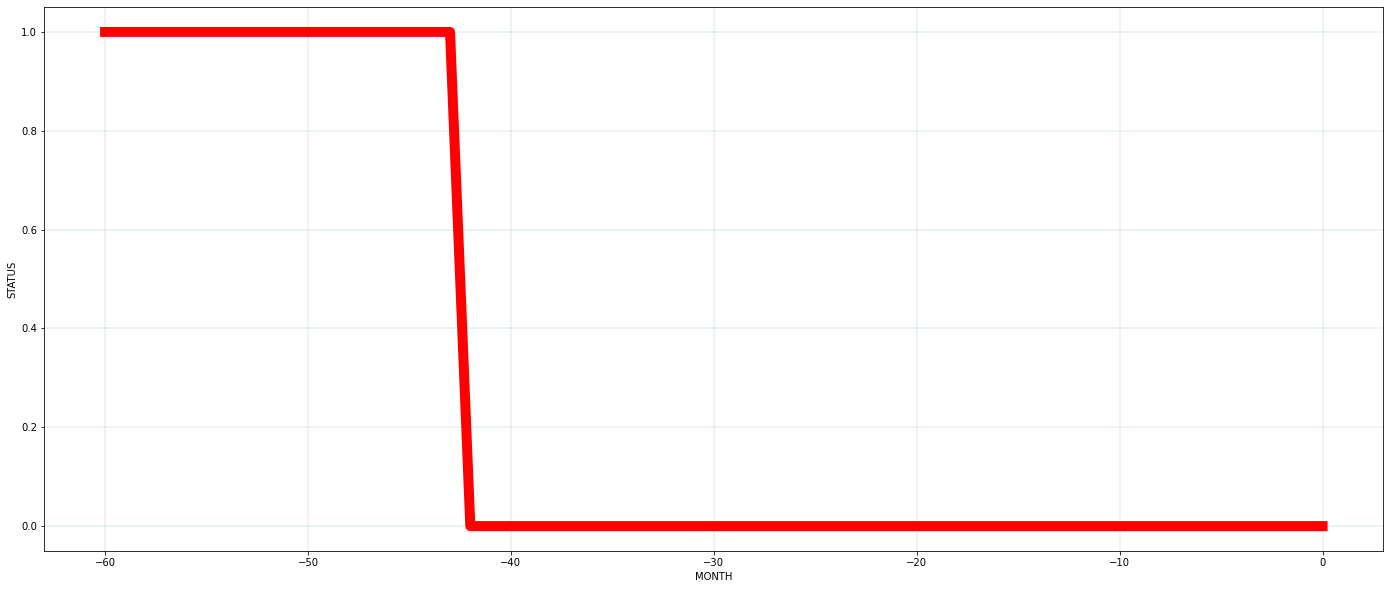

In [12]:
x = pd.DataFrame(df_multiclass.groupby('MONTHS_BALANCE')['STATUS'].agg(pd.Series.mode))
plt.figure(figsize=(24, 10))
plt.xlabel("MONTH")
plt.ylabel("STATUS")
plt.plot(x['STATUS']   ,  color = 'r'  , linewidth=10 )
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)


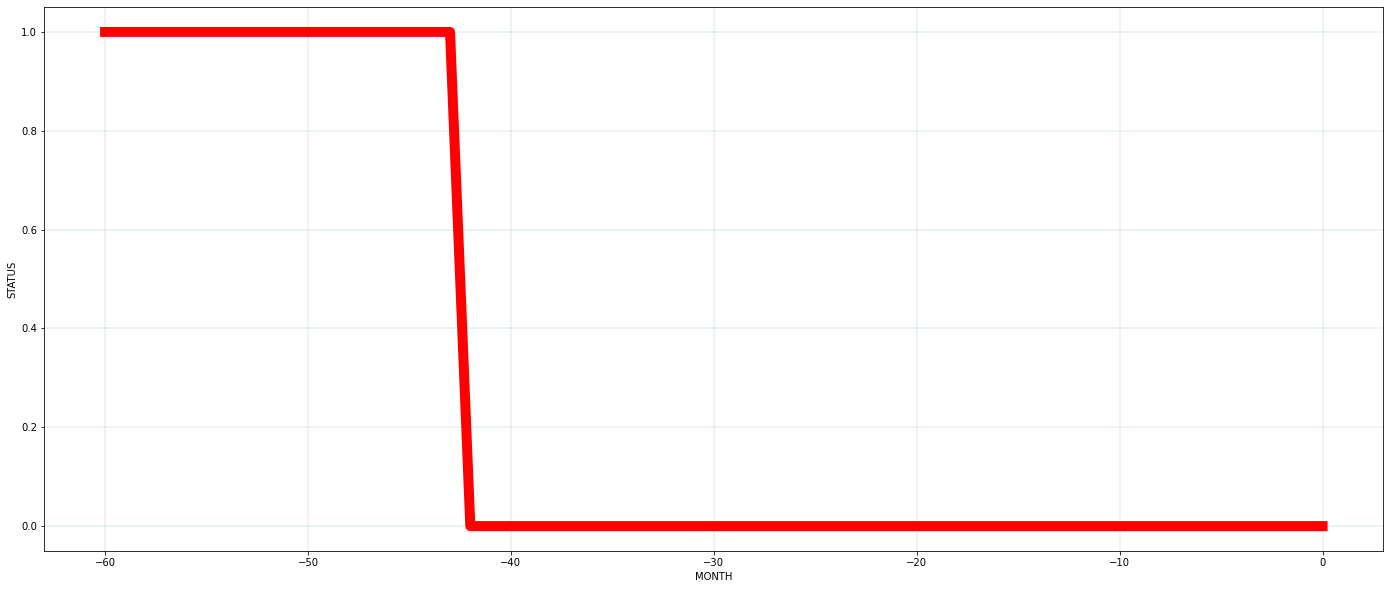

In [13]:
x = pd.DataFrame(df_multiclass.groupby(['ID','MONTHS_BALANCE'])['STATUS'].agg(pd.Series.mode))
x = pd.DataFrame(x.groupby('MONTHS_BALANCE')['STATUS'].agg(pd.Series.mode))
plt.figure(figsize=(24, 10))
plt.xlabel("MONTH")
plt.ylabel("STATUS")
plt.plot(x['STATUS']  ,  color = 'r'  , linewidth=10 )
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)

In [14]:
len(set((df_multiclass[(df_multiclass['STATUS'] != 0) & (df_multiclass['MONTHS_BALANCE'] >= -5) ])['ID']))

15125

In [15]:
df2_dup = df2[df2['ID'].duplicated(keep ='first')]
idx = df2_dup.index.tolist()
df2.drop(idx , inplace = True)
df2.reset_index(drop=True)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001712,0,C
2,5001713,0,X
3,5001714,0,X
4,5001715,0,X
...,...,...,...
45980,5150482,-11,C
45981,5150483,0,X
45982,5150484,0,C
45983,5150485,0,0


In [16]:
df2_dup = df_multiclass[df_multiclass['ID'].duplicated(keep ='first')]
idx = df2_dup.index.tolist()
df_multiclass.drop(idx , inplace = True)
df_multiclass.reset_index(drop=True)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,1


In [17]:
# df_multiclass = df_multiclass[df_multiclass['MONTHS_BALANCE'].isin([0,-1,-2,-3,-4,-5])]
# df2 = df2[df2['MONTHS_BALANCE'].isin([0,-1,-2,-3,-4,-5])]

In [18]:
df2 = df2.reset_index(drop = True)
df_multiclass = df_multiclass.reset_index(drop = True)

In [19]:
df2 = df2.drop(['MONTHS_BALANCE'] ,  axis = 1)
df_multiclass = df_multiclass.drop(['MONTHS_BALANCE'] ,  axis = 1)

In [20]:
df2 = df2.replace( { 'X' : 0 , 'C' : 0  , '0' : 0 , '1':1,'2':1,'3':1 ,'4':1 ,'5':1}  )
df2 = df2.reset_index(drop=True)

In [21]:
df2['STATUS'].value_counts() , df_multiclass['STATUS'].value_counts()

(0    45520
 1      465
 Name: STATUS, dtype: int64,
 0    34973
 1    10547
 2      353
 6       82
 3       19
 4        6
 5        5
 Name: STATUS, dtype: int64)

In [22]:
df2.isnull().sum() , df_multiclass.isnull().sum()

(ID        0
 STATUS    0
 dtype: int64,
 ID        0
 STATUS    0
 dtype: int64)

# 1.2 Prepare Application Record "df2"

In [23]:
df_dup = df[df['ID'].duplicated(keep ='first')]
idx = df_dup.index.tolist()
df.drop(idx , inplace = True)
df.reset_index(drop=True)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438506,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438507,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438508,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


# Combination 

In [24]:
new_df = pd.merge(df, df2, on=['ID'])
new_df = pd.merge(new_df, df_multiclass, on=['ID'])
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_x,STATUS_y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1,6
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1,3


In [25]:
new_df.rename(columns = {'CODE_GENDER':'gender', 'FLAG_OWN_CAR':'car', 'FLAG_OWN_REALTY':'property'
                        , 'CNT_CHILDREN':'children', 'AMT_INCOME_TOTAL':'total_income', 'NAME_INCOME_TYPE':'income_type'
                        , 'NAME_EDUCATION_TYPE':'education', 'NAME_FAMILY_STATUS':'family_status', 'NAME_HOUSING_TYPE':'house_type'
                        , 'DAYS_BIRTH':'age', 'DAYS_EMPLOYED':'employed_age', 'FLAG_MOBIL':'mobile'
                        , 'FLAG_WORK_PHONE':'work_phone', 'FLAG_PHONE':'phone', 'FLAG_EMAIL':'email', 'OCCUPATION_TYPE':'occupation_type'
                        , 'CNT_FAM_MEMBERS':'family_size', 'STATUS_x':'status_one' ,'STATUS_y':'status_multi' }, inplace = True)

In [26]:
new_df

,ID,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,mobile,work_phone,phone,email,occupation_type,family_size,status_one,status_multi
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1,6
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1,3


In [27]:
new_df['age'] = round(-new_df['age']/365)
new_df['employed_age'] = round(-new_df['employed_age']/365)

In [28]:
new_df

,ID,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,mobile,work_phone,phone,email,occupation_type,family_size,status_one,status_multi
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48.0,7.0,1,0,0,0,Managers,2.0,1,6
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34.0,4.0,1,0,1,1,Medicine staff,2.0,0,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34.0,4.0,1,0,1,1,Medicine staff,2.0,0,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.0,2.0,1,0,0,0,Sales staff,2.0,1,3


In [29]:
new_df['status_one'].value_counts()

0    36075
1      382
Name: status_one, dtype: int64

In [30]:
new_df.replace({'M':1 , 'F':0 , 'Y' : 1 , 'N' : 0 } , inplace=True)

In [31]:
x = []
for col in new_df.columns : 
    x.append([col , new_df[col].unique() ,new_df[col].nunique() ])
    
pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues'])

,Feature,Unique_Values,No.OfUniqueValues
0,ID,"[5008804, 5008805, 5008806, 5008808, 5008809, ...",36457
1,gender,"[1, 0]",2
2,car,"[1, 0]",2
3,property,"[1, 0]",2
4,children,"[0, 1, 3, 2, 4, 5, 14, 19, 7]",9
5,total_income,"[427500.0, 112500.0, 270000.0, 283500.0, 13500...",265
6,income_type,"[Working, Commercial associate, Pensioner, Sta...",5
7,education,"[Higher education, Secondary / secondary speci...",5
8,family_status,"[Civil marriage, Married, Single / not married...",5
9,house_type,"[Rented apartment, House / apartment, Municipa...",6


In [32]:
new_df.drop(['mobile'] , inplace = True , axis = 1)

# Negative Values in employed_age

In [33]:
(new_df[new_df['employed_age']<0])['employed_age'].unique() , (new_df[new_df['age']<0])['age'].unique()

(array([-1001.]), array([], dtype=float64))

In [34]:
new_df.describe()

,ID,gender,car,property,children,total_income,age,employed_age,work_phone,phone,email,family_size,status_one,status_multi
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,1.866857e+05,43.777382,-162.410621,0.225526,0.294813,0.089722,2.198453,0.010478,0.262501
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,1.017892e+05,11.519211,377.256457,0.417934,0.455965,0.285787,0.911686,0.101826,0.528325
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,21.000000,-1001.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,34.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,43.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,53.000000,9.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,69.000000,43.000000,1.000000,1.000000,1.000000,20.000000,1.000000,6.000000


In [35]:
neg_age = new_df[new_df['employed_age']<0].index
for i in neg_age :
    
    if (new_df.loc[i , 'age'] <= 34) and (new_df.loc[i , 'age'] >= 21) :
        if new_df.loc[i , 'total_income'] == 27000 :
            new_df.at[i , 'employed_age'] = 2
            
        elif (new_df.loc[i , 'total_income'] <= 225000) and (new_df.loc[i , 'total_income'] > 27000) :
            new_df.at[i , 'employed_age'] = 5
        else :
            new_df.at[i , 'employed_age'] = 7
            
    elif (new_df.loc[i , 'age'] <= 43) and (new_df.loc[i , 'age'] > 34) :
        if new_df.loc[i , 'total_income'] == 27000 :
            new_df.at[i , 'employed_age'] = 7
            
        elif (new_df.loc[i , 'total_income'] < 225000) and (new_df.loc[i , 'total_income'] > 27000) :
            new_df.at[i , 'employed_age'] = 9
        else :
            new_df.at[i , 'employed_age'] = 12
            
            
    elif (new_df.loc[i , 'age'] <= 53) and (new_df.loc[i , 'age'] > 43) :
        if new_df.loc[i , 'total_income'] == 27000 :
            new_df.at[i , 'employed_age'] = 12
            
        elif (new_df.loc[i , 'total_income'] < 225000) and (new_df.loc[i , 'total_income'] > 27000) :
            new_df.at[i , 'employed_age'] = 16
        else :
            new_df.at[i , 'employed_age'] = 20
            
    else :
        if new_df.loc[i , 'total_income'] == 27000 :
            new_df.at[i , 'employed_age'] = 20

        elif (new_df.loc[i , 'total_income'] < 225000) and (new_df.loc[i , 'total_income'] > 27000) :
            new_df.at[i , 'employed_age'] = 22
        else :
            new_df.at[i , 'employed_age'] = 30
        


In [36]:
len(new_df[new_df['employed_age']<0])

0

In [37]:
new_df.describe()

,ID,gender,car,property,children,total_income,age,employed_age,work_phone,phone,email,family_size,status_one,status_multi
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,1.866857e+05,43.777382,9.820556,0.225526,0.294813,0.089722,2.198453,0.010478,0.262501
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,1.017892e+05,11.519211,8.323211,0.417934,0.455965,0.285787,0.911686,0.101826,0.528325
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,34.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,43.000000,7.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,53.000000,15.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,69.000000,43.000000,1.000000,1.000000,1.000000,20.000000,1.000000,6.000000


In [38]:
new_df

,ID,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,work_phone,phone,email,occupation_type,family_size,status_one,status_multi
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,0,0,NaN,2.0,0,0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,0,0,NaN,2.0,0,0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,0,0,0,Security staff,2.0,0,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,0,1,1,Sales staff,1.0,0,1
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,0,1,1,Sales staff,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48.0,7.0,0,0,0,Managers,2.0,1,6
36453,5149834,0,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34.0,4.0,0,1,1,Medicine staff,2.0,0,0
36454,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,34.0,4.0,0,1,1,Medicine staff,2.0,0,0
36455,5150049,0,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.0,2.0,0,0,0,Sales staff,2.0,1,3


In [39]:
new_df.isnull().sum()

ID                     0
gender                 0
car                    0
property               0
children               0
total_income           0
income_type            0
education              0
family_status          0
house_type             0
age                    0
employed_age           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
family_size            0
status_one             0
status_multi           0
dtype: int64

In [40]:
y = []
n_value = pd.DataFrame()
c_value = pd.DataFrame()
for col in new_df.columns :
    if new_df[col].nunique() <= 10:
        y.append(col)

y.remove('children')
y.remove('status_multi')
for col in y :
    if col == 'children' :
        pass
    x = pd.DataFrame(new_df[col].value_counts())
    if new_df[col].nunique() == 2 :
        n_value = n_value.append(x.T)
    else :
        c_value = c_value.append(x)
n_value


C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2559107395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n_value = n_value.append(x.T)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2559107395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n_value = n_value.append(x.T)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2559107395.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n_value = n_value.append(x.T)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2559107395.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c_value = c_value.append(x)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2559107395.py:17: Fu

,0,1
gender,24430,12027
car,22614,13843
property,11951,24506
work_phone,28235,8222
phone,25709,10748
email,33186,3271
status_one,36075,382


In [41]:
c_value

,income_type,education,family_status,house_type,family_size
Working,18819.0,NaN,NaN,NaN,NaN
Commercial associate,8490.0,NaN,NaN,NaN,NaN
Pensioner,6152.0,NaN,NaN,NaN,NaN
State servant,2985.0,NaN,NaN,NaN,NaN
Student,11.0,NaN,NaN,NaN,NaN
Secondary / secondary special,NaN,24777.0,NaN,NaN,NaN
Higher education,NaN,9864.0,NaN,NaN,NaN
Incomplete higher,NaN,1410.0,NaN,NaN,NaN
Lower secondary,NaN,374.0,NaN,NaN,NaN
Academic degree,NaN,32.0,NaN,NaN,NaN


In [42]:
new_df[new_df['income_type'] == 'Student']

,ID,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,work_phone,phone,email,occupation_type,family_size,status_one,status_multi
1316,5010456,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
1317,5010457,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
1318,5010458,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
1319,5010459,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
1320,5010460,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
1321,5010461,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
1322,5010462,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
1323,5010463,0,0,1,0,171000.0,Student,Higher education,Married,House / apartment,51.0,11.0,0,0,1,Core staff,2.0,0,0
4974,5025088,1,0,0,0,135000.0,Student,Higher education,Single / not married,With parents,25.0,2.0,0,0,1,NaN,1.0,0,0
11328,5047796,0,0,1,1,112500.0,Student,Secondary / secondary special,Civil marriage,House / apartment,33.0,2.0,0,0,0,Laborers,3.0,0,1


In [43]:
new_df.at[3679 , 'occupation_type'] = 'Laborers'

In [44]:
new_df[new_df['education'] == 'Academic degree']

,ID,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,work_phone,phone,email,occupation_type,family_size,status_one,status_multi
1784,5011031,0,0,1,1,135000.0,Working,Academic degree,Civil marriage,House / apartment,48.0,21.0,0,1,0,NaN,3.0,0,0
1785,5011032,0,0,1,1,135000.0,Working,Academic degree,Civil marriage,House / apartment,48.0,21.0,0,1,0,NaN,3.0,0,1
1786,5011033,0,0,1,1,135000.0,Working,Academic degree,Civil marriage,House / apartment,48.0,21.0,0,1,0,NaN,3.0,0,0
11797,5048528,0,1,1,1,270000.0,Commercial associate,Academic degree,Married,House / apartment,33.0,3.0,0,0,0,Sales staff,3.0,0,0
11798,5048529,0,1,1,1,270000.0,Commercial associate,Academic degree,Married,House / apartment,33.0,3.0,0,0,0,Sales staff,3.0,0,0
11799,5048530,0,1,1,1,270000.0,Commercial associate,Academic degree,Married,House / apartment,33.0,3.0,0,0,0,Sales staff,3.0,0,0
11800,5048531,0,1,1,1,270000.0,Commercial associate,Academic degree,Married,House / apartment,33.0,3.0,0,0,0,Sales staff,3.0,0,0
11801,5048532,0,1,1,1,270000.0,Commercial associate,Academic degree,Married,House / apartment,33.0,3.0,0,0,0,Sales staff,3.0,0,0
11802,5048533,0,1,1,1,270000.0,Commercial associate,Academic degree,Married,House / apartment,33.0,3.0,0,0,0,Sales staff,3.0,0,0
11803,5048534,0,1,1,1,270000.0,Commercial associate,Academic degree,Married,House / apartment,33.0,3.0,0,0,0,Sales staff,3.0,0,0


# Approx. 50% of Data is duplicated

In [45]:
x = pd.DataFrame(new_df.loc[1301]).T
y = pd.DataFrame(new_df.loc[1302]).T
x = x.append(y)
x = x.drop(['ID','status_multi'] ,axis = 1)
x

C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/31096379.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(y)


,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,work_phone,phone,email,occupation_type,family_size,status_one
1301,0,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.0,22.0,0,0,0,NaN,2.0,0
1302,0,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.0,22.0,0,0,0,NaN,2.0,0


In [46]:
x.drop_duplicates(keep = 'first')

,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,work_phone,phone,email,occupation_type,family_size,status_one
1301,0,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.0,22.0,0,0,0,NaN,2.0,0


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# RePreprocessing Due to duplicates

In [47]:
df2 = pd.read_csv('credit_record.csv')
df2 = df2.replace( { 'X' : 0 , 'C' : 0  , '0' : 0 , '1':1 ,'2':1 ,'3':1 , '4':1 , '5':1 }  )
df2['STATUS'].value_counts()

0    1034381
1      14194
Name: STATUS, dtype: int64

In [48]:
df_client = (df2.groupby(['ID'] , as_index=False)['MONTHS_BALANCE'].min())
df_client.rename(columns = {'MONTHS_BALANCE':'client_months' }, inplace = True)

In [49]:
df_risk = (df2.groupby(['ID'] , as_index=False)['STATUS'].sum())
df_risk.rename(columns = {'STATUS':'risk_coefficient' }, inplace = True)

In [50]:
df_com = pd.merge(df_client,df_risk,on=['ID'])
df_com

,ID,client_months,risk_coefficient
0,5001711,-3,0
1,5001712,-18,0
2,5001713,-21,0
3,5001714,-14,0
4,5001715,-59,0
...,...,...,...
45980,5150482,-28,0
45981,5150483,-17,0
45982,5150484,-12,0
45983,5150485,-1,0


In [51]:
df_com["risk_coefficient"].value_counts()

0     40635
1      2766
2      1094
3       507
4       282
5       177
6       114
7        86
8        62
9        61
11       34
10       30
13       21
14       15
16       14
12       14
15       10
18        7
19        7
17        6
21        5
35        5
20        5
28        4
48        3
22        3
40        2
26        1
46        1
44        1
24        1
23        1
27        1
32        1
25        1
36        1
49        1
30        1
39        1
38        1
31        1
34        1
29        1
Name: risk_coefficient, dtype: int64

In [52]:
for i in df_com.index :
    
    if df_com.at[i , 'risk_coefficient'] == 0 :
        df_com.at[i , 'risk_coefficient'] = 0

            
    else  :
        df_com.at[i , 'risk_coefficient'] = 1
        
df_com['risk_coefficient'].value_counts()

0    40635
1     5350
Name: risk_coefficient, dtype: int64

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [53]:
check = df.drop(['ID'] , axis = 1)
check.duplicated().sum()

348425

In [54]:
check = check.drop_duplicates(keep = 'first')
check = check.reset_index()

In [55]:
df_copy = df.copy(deep = True)
df_copy = df_copy.reset_index()

In [56]:
df_copy = df_copy[df_copy['index'].isin(check['index'])]
df_copy = df_copy.drop(['index'],axis = 1)
df_copy = df_copy.reset_index(drop = True)
df_copy

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90080,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2.0
90081,6839651,F,N,Y,3,99000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-18832,365243,1,0,0,0,NaN,1.0
90082,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,NaN,2.0
90083,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [57]:
len(set((df_copy['ID'])) & (set(df_com['ID'])))

9709

In [58]:
df_copy = pd.merge(df_copy, df_com, on=['ID'])
df_copy


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,client_months,risk_coefficient
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-20,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,1,0,0,0,Laborers,2.0,-20,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,1,0,NaN,2.0,-19,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,-21,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32,1


In [59]:
df_copy.rename(columns = {'CODE_GENDER':'gender', 'FLAG_OWN_CAR':'car', 'FLAG_OWN_REALTY':'property'
                        , 'CNT_CHILDREN':'children', 'AMT_INCOME_TOTAL':'total_income', 'NAME_INCOME_TYPE':'income_type'
                        , 'NAME_EDUCATION_TYPE':'education', 'NAME_FAMILY_STATUS':'family_status', 'NAME_HOUSING_TYPE':'house_type'
                        , 'DAYS_BIRTH':'age', 'DAYS_EMPLOYED':'employed_age', 'FLAG_MOBIL':'mobile'
                        , 'FLAG_WORK_PHONE':'work_phone', 'FLAG_PHONE':'phone', 'FLAG_EMAIL':'email', 'OCCUPATION_TYPE':'occupation_type'
                        , 'CNT_FAM_MEMBERS':'family_size' }, inplace = True)

In [60]:
df_copy['age'] = round(-df_copy['age']/365)
df_copy['employed_age'] = round(-df_copy['employed_age']/365)
df_copy['client_months'] = -df_copy['client_months']
df_copy.replace({'M':1 , 'F':0 , 'Y' : 1 , 'N' : 0 } , inplace=True)
df_copy['risk_coefficient'].value_counts()

0    8426
1    1283
Name: risk_coefficient, dtype: int64

In [61]:
x = []
for col in df_copy.columns : 
    x.append([col , df_copy[col].unique() ,df_copy[col].nunique() ])
    
pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues'])

,Feature,Unique_Values,No.OfUniqueValues
0,ID,"[5008804, 5008806, 5008808, 5008812, 5008815, ...",9709
1,gender,"[1, 0]",2
2,car,"[1, 0]",2
3,property,"[1, 0]",2
4,children,"[0, 1, 3, 2, 4, 5, 14, 19, 7]",9
5,total_income,"[427500.0, 112500.0, 270000.0, 283500.0, 13500...",263
6,income_type,"[Working, Commercial associate, Pensioner, Sta...",5
7,education,"[Higher education, Secondary / secondary speci...",5
8,family_status,"[Civil marriage, Married, Single / not married...",5
9,house_type,"[Rented apartment, House / apartment, Municipa...",6


In [62]:
df_copy = df_copy.drop(['mobile'] , axis = 1)
(df_copy[df_copy['employed_age']<0])['employed_age'].unique() , (df_copy[df_copy['age']<0])['age'].unique()

(array([-1001.]), array([], dtype=float64))

In [63]:
neg_age = df_copy[df_copy['employed_age']<0].index
for i in neg_age :
    
    if (df_copy.loc[i , 'age'] <= 34) and (df_copy.loc[i , 'age'] >= 21) :
        if df_copy.loc[i , 'total_income'] == 27000 :
            df_copy.at[i , 'employed_age'] = 2
            
        elif (df_copy.loc[i , 'total_income'] <= 225000) and (df_copy.loc[i , 'total_income'] > 27000) :
            df_copy.at[i , 'employed_age'] = 5
        else :
            df_copy.at[i , 'employed_age'] = 7
            
    elif (df_copy.loc[i , 'age'] <= 43) and (df_copy.loc[i , 'age'] > 34) :
        if df_copy.loc[i , 'total_income'] == 27000 :
            df_copy.at[i , 'employed_age'] = 7
            
        elif (df_copy.loc[i , 'total_income'] < 225000) and (df_copy.loc[i , 'total_income'] > 27000) :
            df_copy.at[i , 'employed_age'] = 9
        else :
            df_copy.at[i , 'employed_age'] = 12
            
            
    elif (df_copy.loc[i , 'age'] <= 53) and (df_copy.loc[i , 'age'] > 43) :
        if df_copy.loc[i , 'total_income'] == 27000 :
            df_copy.at[i , 'employed_age'] = 12
            
        elif (df_copy.loc[i , 'total_income'] < 225000) and (df_copy.loc[i , 'total_income'] > 27000) :
            df_copy.at[i , 'employed_age'] = 16
        else :
            df_copy.at[i , 'employed_age'] = 20
            
    else :
        if df_copy.loc[i , 'total_income'] == 27000 :
            df_copy.at[i , 'employed_age'] = 20

        elif (df_copy.loc[i , 'total_income'] < 225000) and (df_copy.loc[i , 'total_income'] > 27000) :
            df_copy.at[i , 'employed_age'] = 22
        else :
            df_copy.at[i , 'employed_age'] = 30
        
len(df_copy[df_copy['employed_age']<0])

0

In [64]:
y = []
n_value = pd.DataFrame()
c_value = pd.DataFrame()
for col in df_copy.columns :
    if df_copy[col].nunique() <= 10:
        y.append(col)

y.remove('children')
for col in y :
    x = pd.DataFrame(df_copy[col].value_counts())
    if df_copy[col].nunique() == 2 :
        n_value = n_value.append(x.T)
    else :
        c_value = c_value.append(x)
n_value


C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2612287030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n_value = n_value.append(x.T)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2612287030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n_value = n_value.append(x.T)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2612287030.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n_value = n_value.append(x.T)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2612287030.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c_value = c_value.append(x)
C:\Users\abdos\AppData\Local\Temp/ipykernel_15280/2612287030.py:14: Fu

,0,1
gender,6323,3386
car,6139,3570
property,3189,6520
work_phone,7598,2111
phone,6916,2793
email,8859,850
risk_coefficient,8426,1283


In [65]:
c_value

,income_type,education,family_status,house_type,family_size
Working,4960.0,NaN,NaN,NaN,NaN
Commercial associate,2312.0,NaN,NaN,NaN,NaN
Pensioner,1712.0,NaN,NaN,NaN,NaN
State servant,722.0,NaN,NaN,NaN,NaN
Student,3.0,NaN,NaN,NaN,NaN
Secondary / secondary special,NaN,6761.0,NaN,NaN,NaN
Higher education,NaN,2457.0,NaN,NaN,NaN
Incomplete higher,NaN,371.0,NaN,NaN,NaN
Lower secondary,NaN,114.0,NaN,NaN,NaN
Academic degree,NaN,6.0,NaN,NaN,NaN


In [66]:
df_copy.isnull().sum()

ID                     0
gender                 0
car                    0
property               0
children               0
total_income           0
income_type            0
education              0
family_status          0
house_type             0
age                    0
employed_age           0
work_phone             0
phone                  0
email                  0
occupation_type     2994
family_size            0
client_months          0
risk_coefficient       0
dtype: int64

In [67]:
import statistics
null_calculate = df_copy.groupby(['education','income_type','family_status','house_type'] , as_index=False)['occupation_type'].agg(statistics.mode)

In [68]:
null_calculate.dropna()

,education,income_type,family_status,house_type,occupation_type
0,Academic degree,Commercial associate,Married,House / apartment,Sales staff
5,Higher education,Commercial associate,Civil marriage,House / apartment,Sales staff
7,Higher education,Commercial associate,Married,House / apartment,Managers
10,Higher education,Commercial associate,Married,Rented apartment,Sales staff
11,Higher education,Commercial associate,Married,With parents,Core staff
...,...,...,...,...,...
230,Secondary / secondary special,Working,Widow,Co-op apartment,Core staff
231,Secondary / secondary special,Working,Widow,House / apartment,Laborers
232,Secondary / secondary special,Working,Widow,Municipal apartment,Cleaning staff
233,Secondary / secondary special,Working,Widow,Rented apartment,Sales staff


In [69]:
nulls = df_copy[df_copy['occupation_type'].isna()]

In [70]:
nulls

,ID,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,work_phone,phone,email,occupation_type,family_size,client_months,risk_coefficient
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,0,0,NaN,2.0,15,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,30.0,0,0,0,NaN,1.0,20,0
8,5008834,0,0,1,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,30.0,4.0,0,0,0,NaN,2.0,44,0
16,5008884,0,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,55.0,30.0,0,0,0,NaN,1.0,40,0
21,5008951,1,0,1,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,28.0,8.0,0,0,0,NaN,3.0,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,5118283,1,0,0,0,112500.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,59.0,22.0,0,0,0,NaN,2.0,39,1
9701,5145690,0,0,1,0,306000.0,Pensioner,Higher education,Married,House / apartment,59.0,30.0,0,0,0,NaN,2.0,17,1
9702,5145760,0,1,0,0,135000.0,Working,Higher education,Married,House / apartment,42.0,13.0,0,0,1,NaN,2.0,10,1
9705,5149055,0,0,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.0,7.0,1,1,0,NaN,2.0,19,1


In [71]:
(df_copy.groupby(['gender','car','property','work_phone','phone'] , as_index=False)['occupation_type'].agg(statistics.mode)).dropna()

,gender,car,property,work_phone,phone,occupation_type
3,0,0,0,1,1,Core staff
7,0,0,1,1,1,Sales staff
10,0,1,0,1,0,Core staff
11,0,1,0,1,1,Managers
15,0,1,1,1,1,Sales staff
16,1,0,0,0,0,Laborers
17,1,0,0,0,1,Laborers
18,1,0,0,1,0,Laborers
19,1,0,0,1,1,Laborers
20,1,0,1,0,0,Laborers


In [72]:
df_copy = df_copy.fillna(value='other_types')
df_copy

,ID,gender,car,property,children,total_income,income_type,education,family_status,house_type,age,employed_age,work_phone,phone,email,occupation_type,family_size,client_months,risk_coefficient
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,0,0,other_types,2.0,15,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,0,0,0,Security staff,2.0,29,0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,0,1,1,Sales staff,1.0,4,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,30.0,0,0,0,other_types,1.0,20,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,1,1,1,Accountants,2.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,56.0,1.0,0,0,0,Laborers,2.0,20,1
9705,5149055,0,0,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.0,7.0,1,1,0,other_types,2.0,19,1
9706,5149729,1,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,52.0,5.0,0,0,0,other_types,2.0,21,1
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,34.0,4.0,0,1,1,Medicine staff,2.0,32,1


In [73]:
df_copy = pd.get_dummies(df_copy , prefix='prov' , drop_first=True)
df_copy

,ID,gender,car,property,children,total_income,age,employed_age,work_phone,phone,...,prov_Low-skill Laborers,prov_Managers,prov_Medicine staff,prov_Private service staff,prov_Realty agents,prov_Sales staff,prov_Secretaries,prov_Security staff,prov_Waiters/barmen staff,prov_other_types
0,5008804,1,1,1,0,427500.0,33.0,12.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5008806,1,1,1,0,112500.0,59.0,3.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5008808,0,0,1,0,270000.0,52.0,8.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,5008812,0,0,1,0,283500.0,62.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5008815,1,1,1,0,270000.0,46.0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,56.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9705,5149055,0,0,1,0,112500.0,43.0,7.0,1,1,...,0,0,0,0,0,0,0,0,0,1
9706,5149729,1,1,1,0,90000.0,52.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9707,5149838,0,0,1,0,157500.0,34.0,4.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [74]:
df_copy = df_copy.drop(['ID'] , axis = 1)
from math import log , ceil
columns = df_copy.columns.tolist()
for col in columns :

    a=round(log(df_copy[col].max() , 2))
    if a >= 16 :
            df_copy[col] = df_copy[col].astype(np.int32)
    elif (a < 16) and (a > 8) :
        df_copy[col] = df_copy[col].astype(np.int16)
    else :
        df_copy[col] = df_copy[col].astype(np.int8)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   gender                              9709 non-null   int8 
 1   car                                 9709 non-null   int8 
 2   property                            9709 non-null   int8 
 3   children                            9709 non-null   int8 
 4   total_income                        9709 non-null   int32
 5   age                                 9709 non-null   int8 
 6   employed_age                        9709 non-null   int8 
 7   work_phone                          9709 non-null   int8 
 8   phone                               9709 non-null   int8 
 9   email                               9709 non-null   int8 
 10  family_size                         9709 non-null   int8 
 11  client_months                       9709 non-null   int8 
 12  risk_c

In [75]:
df_copy['employed_age'].min()

0

In [76]:
def handling_outliers(df , display = False , drop = False , drop_order = 1 ,columns_to_display = [], columns_to_drop = []):
    
    numerical_columns = list((df.select_dtypes(include=np.number)).columns)


    if display == True :
        if (len(columns_to_display) != 0) :
            numerical_columns = columns_to_display
        from math import ceil
        x = ceil(len(numerical_columns)/3)
        if len(numerical_columns) >= 9 :
            plt.figure(figsize=(15,25))
        else : 
            plt.figure(figsize=(24,10))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Outliers Detection")
        for i in numerical_columns :
            y =  numerical_columns.index(i) + 1
            ax = plt.subplot(x, 3, y)
            ax = sns.boxplot(x = df[i] ,data = df)
            ax.set_title(i)
            
    if drop == True :
        if (len(columns_to_drop) != 0) :
            numerical_columns = columns_to_drop
        elif drop_order < 1 :
            drop_order = 1
        
        ## If Data Normally distributed so, we will use z-socre to drop outlier
        ## check on data if it normally distributed or skewed 
        import scipy.stats as stats
        
        while drop_order != 0 :
            for col in  numerical_columns :
                p_value = stats.normaltest(df[col])
                if p_value[1] >= .05 :                                      ## col is normally distributed
                    filt = (df[col]-df[col].mean())/df[col].std()
                    indexes = (filt[filt > 3]).index
                    df.drop(indexes , inplace = True )
                    df.reset_index(drop=True , inplace=True)
                
                else :                                                     ## col is Skewed 
            
                    q1 = df[col].quantile(0.25)
                    q3 = df[col].quantile(0.75)
                    iqr = q3 - q1
                    lower = q1 - 1.5*iqr
                    if lower < 0 :
                        lower = 0
                    higher = q3 + 1.5*iqr
                    df = df [df[col] >= lower] 
                    df = df [df[col] <= higher ]
                    df.reset_index(drop=True , inplace=True)
            
            drop_order = drop_order - 1
            
            
    return df


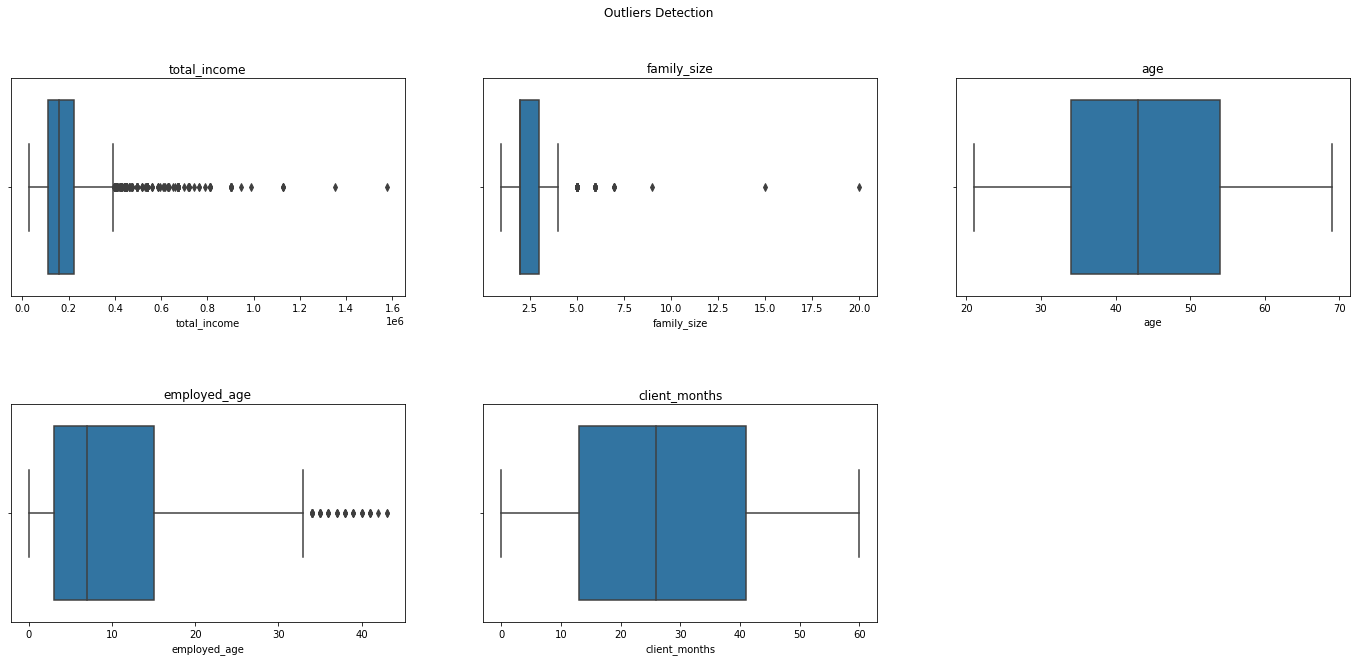

In [77]:
dd = handling_outliers(df_copy , display=True ,drop=True, 
                  columns_to_display=['total_income','family_size','age','employed_age','client_months'],
                  columns_to_drop=['total_income','family_size','age','employed_age','client_months'])

,gender,car,property,children,total_income,age,employed_age,work_phone,phone,email,...,prov_Low-skill Laborers,prov_Managers,prov_Medicine staff,prov_Private service staff,prov_Realty agents,prov_Sales staff,prov_Secretaries,prov_Security staff,prov_Waiters/barmen staff,prov_other_types
0,1,1,1,0,112500,59,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,270000,52,8,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,283500,62,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,270000,46,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,135000,49,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,0,0,0,0,180000,56,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9229,0,0,1,0,112500,43,7,1,1,0,...,0,0,0,0,0,0,0,0,0,1
9230,1,1,1,0,90000,52,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9231,0,0,1,0,157500,34,4,0,1,1,...,0,0,1,0,0,0,0,0,0,0


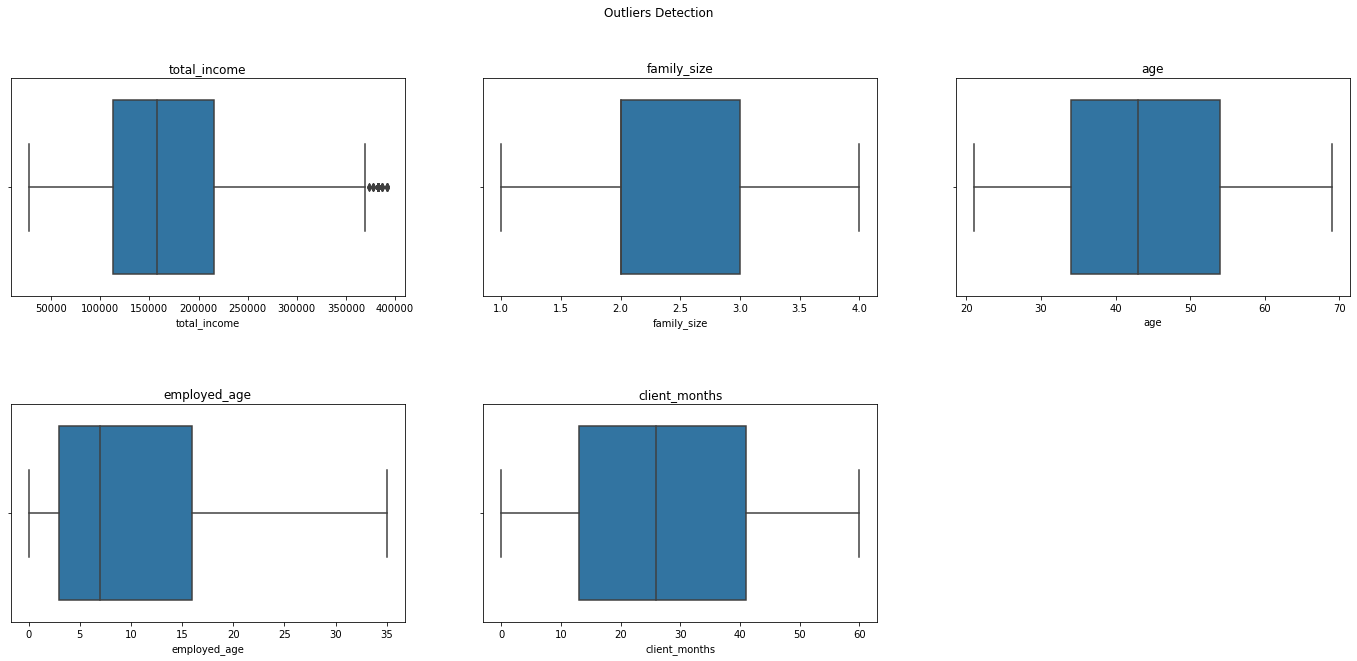

In [78]:
handling_outliers(dd , display=True , 
                  columns_to_display=['total_income','family_size','age','employed_age','client_months']
                  )

In [79]:
df_copy2 = dd.copy(deep = True).reset_index(drop = True )
df_copy2

,gender,car,property,children,total_income,age,employed_age,work_phone,phone,email,...,prov_Low-skill Laborers,prov_Managers,prov_Medicine staff,prov_Private service staff,prov_Realty agents,prov_Sales staff,prov_Secretaries,prov_Security staff,prov_Waiters/barmen staff,prov_other_types
0,1,1,1,0,112500,59,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,270000,52,8,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,283500,62,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,270000,46,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,135000,49,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,0,0,0,0,180000,56,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9229,0,0,1,0,112500,43,7,1,1,0,...,0,0,0,0,0,0,0,0,0,1
9230,1,1,1,0,90000,52,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9231,0,0,1,0,157500,34,4,0,1,1,...,0,0,1,0,0,0,0,0,0,0


# ML

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score 

In [81]:
x = df_copy2.drop(['risk_coefficient'] , axis = 1)
y = df_copy2['risk_coefficient']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [82]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() , RandomForestClassifier(),ExtraTreeClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model
    model.fit(x_train , y_train)
    for i in range(2) :
        
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
    

C:\Users\abdos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,87,0,0,0
LogisticRegression() _ Test Details,86,0,0,0
KNeighborsClassifier() _ Train Details,88,19,67,11
KNeighborsClassifier() _ Test Details,85,5,15,3
DecisionTreeClassifier() _ Train Details,100,100,100,100
DecisionTreeClassifier() _ Test Details,77,16,16,17
RandomForestClassifier() _ Train Details,100,100,100,100
RandomForestClassifier() _ Test Details,86,2,29,1
ExtraTreeClassifier() _ Train Details,100,100,100,100
ExtraTreeClassifier() _ Test Details,76,16,15,16


# Try PCA

In [84]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components=10)
  
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca.explained_variance_ratio_
np.sum(pca.explained_variance_ratio_)

0.9999999996726956

In [85]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() , RandomForestClassifier(),ExtraTreeClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model
    model.fit(x_train , y_train)
    for i in range(2) :
        
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
    

In [86]:
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,45,21,13,56
LogisticRegression() _ Test Details,44,21,13,54
KNeighborsClassifier() _ Train Details,88,20,68,11
KNeighborsClassifier() _ Test Details,85,5,16,3
DecisionTreeClassifier() _ Train Details,100,100,100,100
DecisionTreeClassifier() _ Test Details,76,14,14,15
RandomForestClassifier() _ Train Details,100,100,100,100
RandomForestClassifier() _ Test Details,86,0,0,0
ExtraTreeClassifier() _ Train Details,100,100,100,100
ExtraTreeClassifier() _ Test Details,76,15,15,16


# Try SMOTE "Synthetic Minority Over-sampling Technique"

In [114]:
x = df_copy2.drop(['risk_coefficient'] , axis = 1)
y = df_copy2['risk_coefficient']

In [115]:
from imblearn.over_sampling import SMOTE

method = SMOTE()

x_res ,y_res = method.fit_resample(x , y)

In [116]:
x = df_copy2.drop(['risk_coefficient'] , axis = 1)
y = df_copy2['risk_coefficient']
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3, random_state = 42)

In [117]:
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() , RandomForestClassifier(),ExtraTreeClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model
    model.fit(x_train , y_train)
    for i in range(2) :
        
        if i == 0 :
            to_pred = x_train
            pred = y_train
            title = 'Train'
            
        else :
            to_pred = x_test
            pred = y_test
            title = 'Test'
        y_pred = model.predict(to_pred)
        acc = round(accuracy_score(pred , y_pred)*100)
        f1 = round(f1_score(pred , y_pred)*100)
        prec = round(precision_score(pred , y_pred)*100)
        recall = round(recall_score(pred , y_pred)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )
    

In [118]:
classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,55,55,55,55
LogisticRegression() _ Test Details,55,54,55,54
KNeighborsClassifier() _ Train Details,84,85,77,95
KNeighborsClassifier() _ Test Details,76,79,69,91
DecisionTreeClassifier() _ Train Details,100,100,100,100
DecisionTreeClassifier() _ Test Details,83,83,81,85
RandomForestClassifier() _ Train Details,100,100,100,100
RandomForestClassifier() _ Test Details,90,90,95,85
ExtraTreeClassifier() _ Train Details,100,100,100,100
ExtraTreeClassifier() _ Test Details,83,83,81,84


# OVER ' Over-Fitting ' Problem


In [119]:
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])
model =RandomForestClassifier( n_jobs= -1 ,n_estimators= 2000 , min_samples_leaf=2 , min_samples_split=2 , max_depth=50).fit(x_train , y_train)
    

for i in range(2) :

    if i == 0 :
        to_pred = x_train
        pred = y_train
        title = 'Train'

    else :
        to_pred = x_test
        pred = y_test
        title = 'Test'
    y_pred = model.predict(to_pred)
    acc = round(accuracy_score(pred , y_pred)*100)
    f1 = round(f1_score(pred , y_pred)*100)
    prec = round(precision_score(pred , y_pred)*100)
    recall = round(recall_score(pred , y_pred)*100)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                 , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format('RandomForrest' , title) } ,inplace=True )
classification_report

,Accuracy,F1_score,Precision,Recall
RandomForrest _ Train Details,95,94,99,90
RandomForrest _ Test Details,89,89,95,83


In [120]:
from sklearn.metrics import confusion_matrix , classification_report

In [121]:
y_pred = model.predict(x_test)

In [122]:
confusion_matrix(y_test , y_pred)

array([[2328,   96],
       [ 414, 1972]], dtype=int64)